# **Project Data Mining Prediksi Diabetes Dengan Algoritma Random Forest**

**Nama  : Imaduddien Al Bayan Hidayatul 'Haq**

**NIM   :  C2C020020**

# ***Import Library Yang Akan digunakan untuk EDA***



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                             #visualisation
import matplotlib.pyplot as plt                   #visualisation
from sklearn.preprocessing import MinMaxScaler    #Normalisasi
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Import Dataset Yang Akan digunakan***

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Semester 6/Data Mining/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# ***Cek tipe data setiap atribut atau fitur***

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# ***Menganalisis Korelasi / Hubungan Antara Fitur***


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


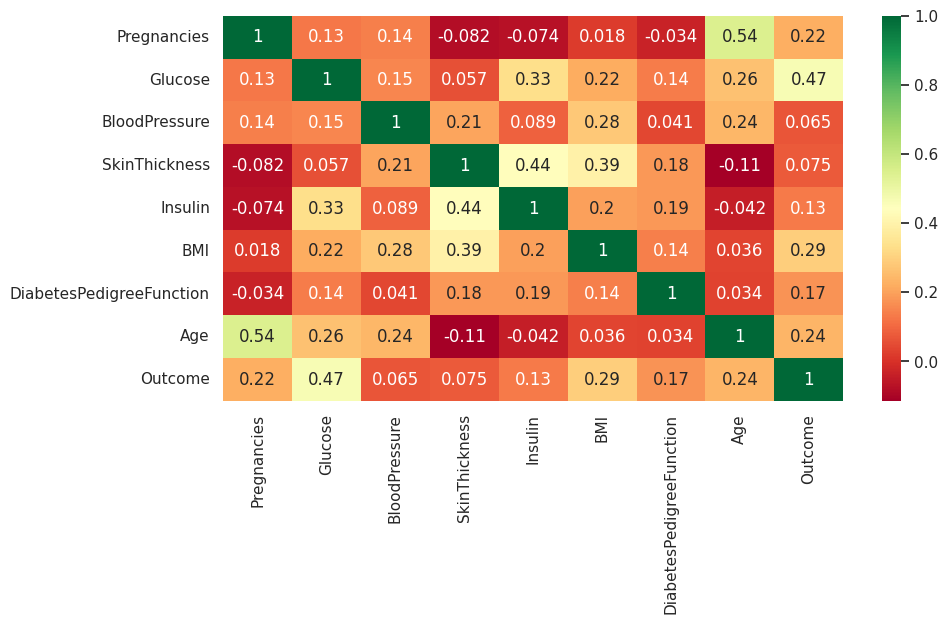

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)
c

# ***Menghapus Fitur Yang Memiliki Fitur / Korelasi Yang Rendah***

*Langkah ini memang diperlukan dalam setiap Exploratory Data Analisis (EDA) karena terkadang ada banyak kolom yang tidak perlu digunakan, dan dalam kasus seperti itu, menghapus adalah satu-satunya solusi.*

In [ ]:
# df = df.drop([''], axis=1) #Untuk Menghapus Fitur

# ***Menghapus Missing Value***

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df = df.dropna()    # Menghapus missing values.
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

# ***Menghapus Data Redundansi Atau Duplikat***

Disini kita dapat mengahpus data duplikat, tetapi pada dataset untuk data duplikat tidak ada

In [ ]:
df.shape

(768, 9)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Jumlah Baris Duplikat ", duplicate_rows_df.shape)

Jumlah Baris Duplikat  (0, 9)


In [ ]:
df.count()      # Untuk Melihat Jumlah Data Fitur

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [ ]:
df = df.drop_duplicates() # Untuk Menghapus Data Duplikat

# ***Mendeteksi Nilai Outlier***

*Outlier adalah titik atau set titik yang berbeda dari titik-titik lainnya. Kadang-kadang mereka bisa sangat tinggi atau sangat rendah. Seringkali merupakan ide yang baik untuk mendeteksi dan mengatasi outlier, karena outlier adalah salah satu alasan utama yang mengakibatkan model yang kurang akurat.*

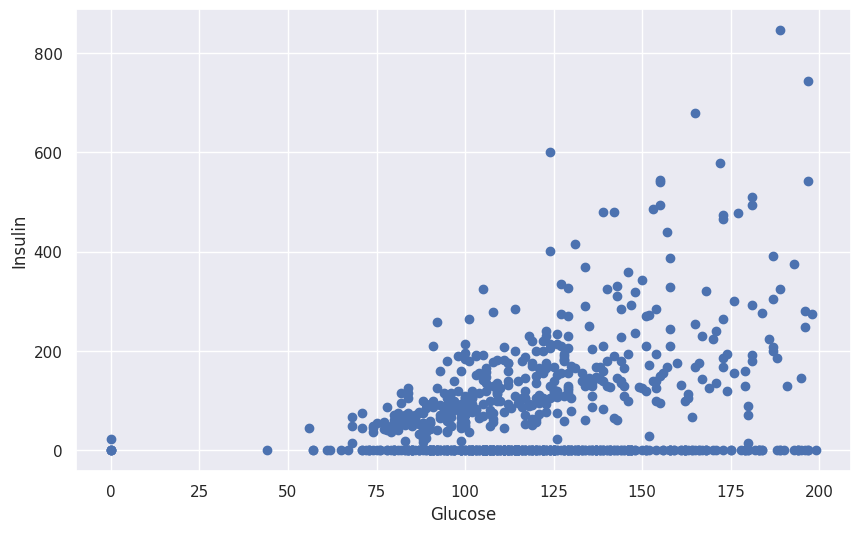

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Glucose'], df['Insulin'])
ax.set_xlabel('Glucose')
ax.set_ylabel('Insulin')
plt.show()

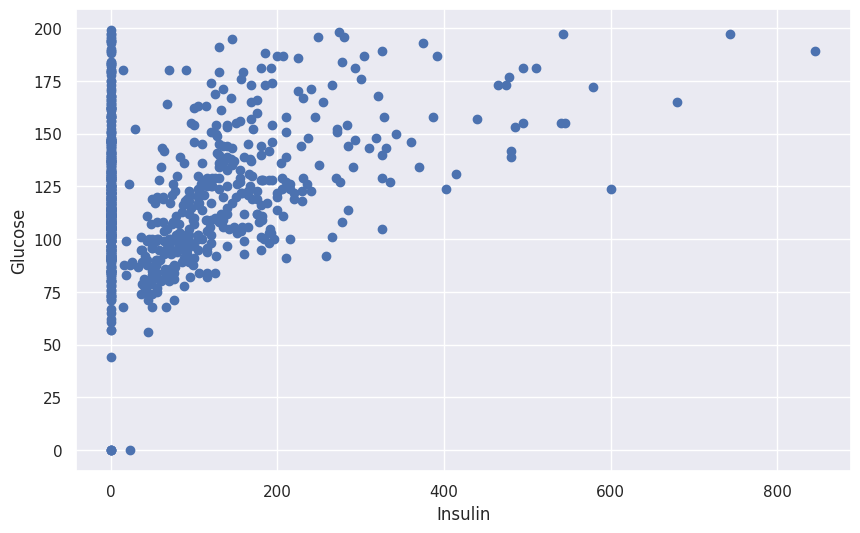

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Insulin'], df['Glucose'])
ax.set_xlabel('Insulin')
ax.set_ylabel('Glucose')
plt.show()

# ***Data Normalization***

***Memisahkan Antara Fitur Dan Label***

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 8].values

*Data normalization adalah proses mengubah variabel-variabel dalam dataset menjadi skala yang seragam atau normal. Tujuan dari data normalization adalah untuk menghilangkan perbedaan skala antar variabel sehingga dapat meningkatkan kinerja model atau algoritma machine learning.*

*Manfaat dari data normalization :*

*Mengurangi efek outliers: Outliers atau pencilan dapat memiliki dampak yang signifikan terhadap model atau algoritma. Dengan melakukan normalisasi, outlier dapat diurangi dampaknya dan mencegahnya dari mengganggu hasil yang dihasilkan.*

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)

MinMaxScaler()

In [ ]:
X = scaler.transform(X)

In [ ]:
print(X)
print(Y)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 

# ***Mulai Melakukan Modeling***

***Import Library Yang Akan digunakan untuk Modeling***


In [ ]:
from sklearn.model_selection import train_test_split   # Untuk Melakukan Split Data Training Dan Testing
from sklearn import metrics                            #
from sklearn.ensemble import RandomForestClassifier    # Algoritma Random Forest

***Memisahkan Data Training Dan Data Testing***


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

***Membuat Model***


In [ ]:
model = RandomForestClassifier(criterion = "gini", n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

***Mengecek Akurasi Model Dengan Data Training***

In [ ]:
x_train_pred = model.predict(X_train)

In [ ]:
print("Akurasi Data Training:",metrics.accuracy_score(y_train, x_train_pred))

Akurasi Data Training: 0.9776536312849162


***Mengecek Akurasi Model Dengan Data Testing***

In [ ]:
x_testing_pred = model.predict(X_test)

In [ ]:
print("Akurasi Data Training:",metrics.accuracy_score(y_test, x_testing_pred))

Akurasi Data Training: 0.7619047619047619


# ***Menyimpan Model Yang Sudah Dibuat***

In [ ]:
import pickle

In [ ]:
file_name = 'Diabates_Model.sav'
pickle.dump(model, open(file_name, 'wb'))